In [1]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataBase = mysql.connector.connect(
    host ='localhost',
    user ='root',
    passwd ='***')

cur = dataBase.cursor()

# 1. Структура БД

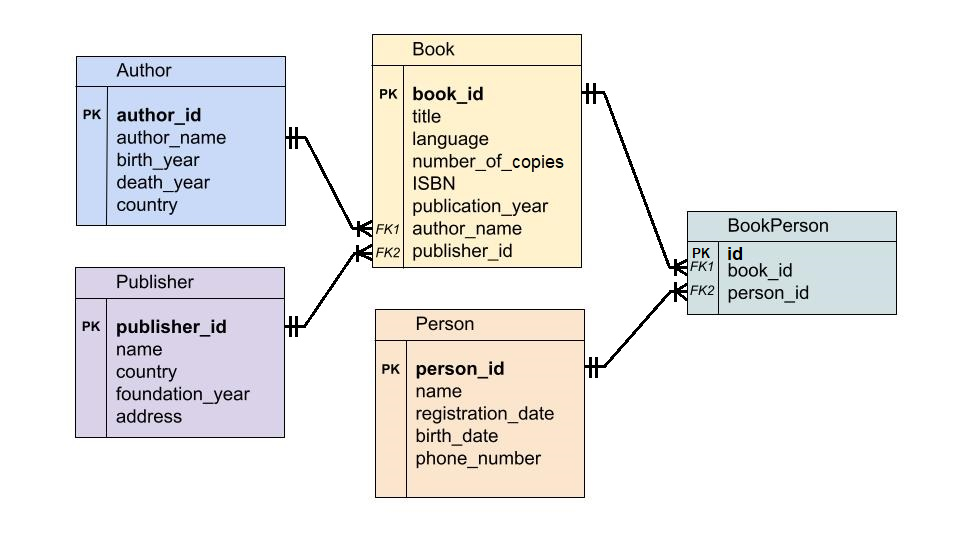

# 2. CRUD
### 2.1 Creating database and tables, inserting values

In [11]:
cur.execute('CREATE DATABASE IF NOT EXISTS library')

In [30]:
dataBase.commit()

In [3]:
cur.execute('USE library')

In [31]:
author_table = """
CREATE TABLE Author (
    author_id INT PRIMARY KEY,
    author_name VARCHAR(50) NOT NULL UNIQUE KEY,
    birth_date DATE NOT NULL,
    death_date DATE,
    country VARCHAR(50) NOT NULL
)
"""
cur.execute(author_table)
dataBase.commit()

In [17]:
publisher_table = """
CREATE TABLE Publisher (
    publisher_id INT PRIMARY KEY,
    name VARCHAR(50) NOT NULL,
    country VARCHAR(50) NOT NULL,
    foundation_year INT NOT NULL,
    address VARCHAR(50) NOT NULL
    )
"""

cur.execute(publisher_table)
dataBase.commit()

In [66]:
book_table = """
CREATE TABLE Book (
    book_id INT PRIMARY KEY,
    title VARCHAR(100) NOT NULL,
    language VARCHAR(50) NOT NULL,
    number_of_copies INT NOT NULL,
    ISBN BIGINT NOT NULL,
    publication_year INT NOT NULL,
    author_name VARCHAR(50) NOT NULL,
    publisher_id INT NOT NULL,
    FOREIGN KEY (author_name) REFERENCES Author(author_name),
    FOREIGN KEY (publisher_id) REFERENCES Publisher(publisher_id)
    )
"""

cur.execute(book_table)
dataBase.commit()

In [74]:
person_table = """
CREATE TABLE Person (
    person_id INT PRIMARY KEY,
    name VARCHAR(50) NOT NULL,
    registration_date DATE NOT NULL,
    birth_date DATE NOT NULL,
    phone_number BIGINT NOT NULL
    )
"""

cur.execute(person_table)
dataBase.commit()

In [76]:
bookPerson_table = """
CREATE TABLE BookPerson (
    id INT PRIMARY KEY,
    book_id INT NOT NULL,
    person_id INT NOT NULL,
    FOREIGN KEY (book_id) REFERENCES Book(book_id),
    FOREIGN KEY (person_id) REFERENCES Person(person_id)
    )
"""

cur.execute(bookPerson_table)
dataBase.commit()

In [41]:
author_insert = """
INSERT INTO Author (author_id, author_name, birth_date, death_date, country)
VALUES (%s, %s, %s, %s, %s)
"""
author_val = [(1, 'Jane Thompson', '1956-03-14', None, 'Ireland'),
              (2, 'Simone Nesset', '1996-11-29', None, 'Scotland'),
              (3, 'Billy Ray', '1885-05-13', '1954-06-03', 'USA'),
              (4, 'Jackey Jake', '1964-09-19', '2005-08-10', 'Australia'),
              (5, 'Tar Krieger', '1606-07-11', None, 'Transylvania'),
              (6, 'Baron Urbigerus', '1665-04-25', '1690-12-31', 'England'),
             (7, 'Gabbs S.', '1111-11-11', '1111-11-11', 'Kkk')]
 
cur.executemany(author_insert, author_val)
dataBase.commit()

In [52]:
publisher_insert = """
INSERT INTO Publisher (publisher_id, name, country, foundation_year, address)
VALUES (%s, %s, %s, %s, %s)
"""
publisher_val = [(1, 'Navuka', 'France', 1690, 'Pl. de la Bastille, 75004 Paris, France'),
                 (2, 'Melrose', 'USAA', 1927, '140 E 63rd St, New York, NY 10065, USA'),
                 (3, 'Boleyn', 'UK', 1953, 'London EC3N 4AB, UK')]
 
cur.executemany(publisher_insert, publisher_val)
dataBase.commit()

In [70]:
book_insert = """
INSERT INTO Book (book_id, title, language, number_of_copies, ISBN, publication_year, author_name, publisher_id)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""
book_val = [(1, 'Aphorismi Urbigerani', 'German', 2, 9781628041606, 2020, 'Baron Urbigerus', 3),
            (2, 'Birds of Antarctica', 'English', 2, 9781623340506, 1988, 'Jane Thompson', 3),
            (3, 'Poison Dart Frogs', 'Romanian', 1, 9781440590542, 2003, 'Jane Thompson', 2),
            (4, 'Spiders Near and Far', 'Latin', 1, 9781623340674, 1744, 'Tar Krieger', 3),
            (5, 'Finding Your Way: The Art of Natural Navigation', 'English', 6, 9780761309567, 2010, 'Simone Nesset', 1),
            (6, 'Nature Displayed in the Heavens', 'English', 5, 9780371612750, 2006, 'Simone Nesset', 3),
            (7, 'Destination: Cocktails', 'English', 3, 9781595808431, 2021, 'Jackey Jake', 2),
            (8, 'The Nature of Maria Morevna and Koschei the Wizard', 'French', 2, 9780691207063, 1653, 'Tar Krieger', 1),
            (9, 'Monet, Narcissus, and Self-Reflection: The Modernist Myth of the Self', 'French', 4, 9781443890106, 1876, 'Tar Krieger', 1),
            (10, 'Wandering albatross', 'French', 5, 9780316182096, 1927, 'Billy Ray', 2)]
 
cur.executemany(book_insert, book_val)
dataBase.commit()

In [78]:
person_insert = """
INSERT INTO Person (person_id, name, registration_date, birth_date, phone_number)
VALUES (%s, %s, %s, %s, %s)
"""
person_val = [(1, 'Alice Klint', '2012-10-14', '1989-05-05', 441632960216),
            (2, 'Jadis W. W.', '1999-02-15', '1955-05-02', 3655643315)]
 
cur.executemany(person_insert, person_val)
dataBase.commit()

In [79]:
bookPerson_insert = """
INSERT INTO BookPerson (id, book_id, person_id)
VALUES (%s, %s, %s)
"""
bookPerson_val = [(1, 1, 1),
                  (2, 1, 2),
                  (3, 9, 2),
                  (4, 2, 1),
                  (5, 10, 1),
                  (6, 6, 1),
                  (7, 3, 2),
                  (8, 4, 2),
                  (9, 5, 1)]
 
cur.executemany(bookPerson_insert, bookPerson_val)
dataBase.commit()

### 2.2 Reading data from a table

In [26]:
df = pd.read_sql_query('Select * from Author;', dataBase)
df

,author_id,author_name,birth_date,death_date,country
0,1,Jane Thompson,1956-03-14,None,Ireland
1,2,Simone Nesset,1996-11-29,None,Scotland
2,3,Billy Ray,1885-05-13,1954-06-03,USA
3,4,Jackey Jake,1964-09-19,2005-08-10,Australia
4,5,Tar Krieger,1606-07-11,None,Transylvania
5,6,Baron Urbigerus,1665-04-25,1690-12-31,England
6,7,Gabbs S.,1111-11-11,1111-11-11,Kkk


### 2.2 Deleating a row from a table

In [27]:
author_delete = "DELETE FROM Author WHERE birth_date = '1111-11-11'"
cur.execute(author_delete)
dataBase.commit()

In [28]:
df = pd.read_sql_query('Select * from Author;', dataBase)
df

,author_id,author_name,birth_date,death_date,country
0,1,Jane Thompson,1956-03-14,None,Ireland
1,2,Simone Nesset,1996-11-29,None,Scotland
2,3,Billy Ray,1885-05-13,1954-06-03,USA
3,4,Jackey Jake,1964-09-19,2005-08-10,Australia
4,5,Tar Krieger,1606-07-11,None,Transylvania
5,6,Baron Urbigerus,1665-04-25,1690-12-31,England


### 2.2 Updating value

In [31]:
df = pd.read_sql_query('Select * from Publisher;', dataBase)
df

,publisher_id,name,country,foundation_year,address
0,1,Navuka,France,1690,"Pl. de la Bastille, 75004 Paris, France"
1,2,Melrose,USAA,1927,"140 E 63rd St, New York, NY 10065, USA"
2,3,Boleyn,UK,1953,"London EC3N 4AB, UK"


In [32]:
publisher_update = "UPDATE Publisher SET country = 'USA' WHERE name ='Melrose'"
cur.execute(publisher_update)
dataBase.commit()

In [33]:
df = pd.read_sql_query('Select * from Publisher;', dataBase)
df

,publisher_id,name,country,foundation_year,address
0,1,Navuka,France,1690,"Pl. de la Bastille, 75004 Paris, France"
1,2,Melrose,USA,1927,"140 E 63rd St, New York, NY 10065, USA"
2,3,Boleyn,UK,1953,"London EC3N 4AB, UK"


# 3. SELECT  + фильтрация
Какие есть книги  на английском?

In [9]:
df = pd.read_sql_query('''
SELECT *
FROM Book
WHERE language = "English";''', dataBase)
df

,book_id,title,language,number_of_copies,ISBN,publication_year,author_name,publisher_id
0,2,Birds of Antarctica,English,2,9781623340506,1988,Jane Thompson,3
1,5,Finding Your Way: The Art of Natural Navigation,English,6,9780761309567,2010,Simone Nesset,1
2,6,Nature Displayed in the Heavens,English,5,9780371612750,2006,Simone Nesset,3
3,7,Destination: Cocktails,English,3,9781595808431,2021,Jackey Jake,2


# 4. SELECT + группировка и агрегация
Распределение книг по языкам:
- аггрегация: `COUNT(*)`
- группировка: `GROUP BY language`

In [10]:
df = pd.read_sql_query('''
SELECT language, COUNT(*) AS LanguagesCount
FROM Book
GROUP BY language;
''', dataBase)
df

,language,LanguagesCount
0,German,1
1,English,4
2,Romanian,1
3,Latin,1
4,French,3


# 5. SELECT + вложенный запрос
Сколько копий книг *Simone Nesset* доступно в библиотеке?

In [11]:
df = pd.read_sql_query('''
SELECT *
FROM (
  SELECT author_name, SUM(number_of_copies)
  FROM Book
  GROUP BY author_name
) AS results
WHERE author_name = "Simone Nesset";
''', dataBase
)
df

,author_name,SUM(number_of_copies)
0,Simone Nesset,11.0


# 6. SELECT + JOIN + что-то
На каких языках читают посетители библиотеки?
1. join трех таблиц
2. группировка:
     - `GROUP_CONCAT` объединяет уникальные языки, связанные с каждым именем, в одну строку, отсортированную по алфавиту
     - `GROUP BY` по именам посетителей

In [26]:
df = pd.read_sql_query('''
SELECT
    Person.name,
    GROUP_CONCAT(DISTINCT Book.language ORDER BY Book.language ASC) AS languages
FROM Person
    JOIN BookPerson ON Person.person_id = BookPerson.person_id
    JOIN Book ON BookPerson.book_id = Book.book_id
GROUP BY
    Person.name;''', dataBase
)
df

,name,languages
0,Alice Klint,"English,French,German"
1,Jadis W. W.,"French,German,Latin,Romanian"


    1 Красивая структура БД (логическая модель)
    2 CRUD
    3 SELECT  + фильтрация
    4 SELECT + группировка и агрегация
    5 SELECT + вложенный запрос
    6 SELECT + JOIN + что-то — запрос должен быть относительно сложным (например, join нескольких таблиц или группировка + агрегация + фильтрация + вложенный запрос и т.д.)
    7 Процедура или функция
    8 Триггер или Транзакция
    9 Ещё одна любая практическая вещь, которая понравилась на курсе
    10 Это полноценное решение, описанное в скрипте или в тетрадке (если работаете с коннектором) – я могу запустить весь скрипт сразу и ничего не сломается

# 7. Процедура
Какие авторы родились в этой стране? Что они написали?

In [5]:
country_procedure = '''
CREATE PROCEDURE AuthorByCountry(IN country_name VARCHAR(50))
BEGIN
    SELECT Author.author_name, Book.title
    FROM
        Author
    JOIN
        Book ON Author.author_name = Book.author_name
    WHERE
        Author.country = country_name;
END;
'''
cur.execute(country_procedure)
dataBase.commit()

In [6]:
df = pd.read_sql_query("CALL AuthorByCountry('Australia');", dataBase)
df

,author_name,title
0,Jackey Jake,Destination: Cocktails


# 8 Триггер
Если посетителям пытаются выдать количество копий книги больше, чем доступно в библиотеке (*количество копий не может быть меньше 0*)

In [15]:
trigger_query = """
CREATE TRIGGER UpdateBookCopies
BEFORE UPDATE ON Book
FOR EACH ROW
BEGIN
    IF NEW.number_of_copies < 0 THEN
        SIGNAL SQLSTATE '45000'
        SET MESSAGE_TEXT = 'Количество копий не может быть меньше 0';
    END IF;
END;
"""
cur.execute(trigger_query)
dataBase.commit()

In [23]:
df = pd.read_sql_query('SELECT title, number_of_copies FROM Book WHERE book_id = 1;', dataBase)
df

,title,number_of_copies
0,Aphorismi Urbigerani,2


In [20]:
cur.execute('UPDATE Book SET number_of_copies = number_of_copies-3 WHERE book_id = 1')

DatabaseError: 1644 (45000): Количество копий не может быть меньше 0

In [ ]:
# disconnecting from server
dataBase.close()